<a href="https://colab.research.google.com/github/Jdtgonzalvo/TESLA-AND-GAMESTOP-STOCK-AND-REVENUE-ANALYSIS/blob/main/TESLA_STOCK_AND_REVENUE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install yfinance
# !pip install fbprophet
# !pip install pandas
# !pip install pystan
# !pip install bs4
# !pip install plotly

In [ ]:
import yfinance as yf
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function

This function will accept three parameters: 1) Dataframe that contains stockdata (i.e Date, Open, Close), 2) Dataframe that contains the revenue data of the company, 3) String that contains the stockname

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Use yfinance to extract StockData (TESLA) 

In [ ]:
tesla = yf.Ticker('TSLA')

In [ ]:
tesla_data = tesla.history(period='max')

In [ ]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [ ]:
tesla_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2764,2021-06-22,618.250000,628.570007,615.500000,623.710022,19158900,0,0.0
2765,2021-06-23,632.000000,657.200012,630.039978,656.570007,31099200,0,0.0
2766,2021-06-24,674.989990,697.619995,667.609985,679.820007,45982400,0,0.0
2767,2021-06-25,689.580017,693.809998,668.700012,671.869995,32429000,0,0.0
2768,2021-06-28,671.640015,694.700012,670.320007,688.719971,21591000,0,0.0


In [ ]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2769 non-null   datetime64[ns]
 1   Open          2769 non-null   float64       
 2   High          2769 non-null   float64       
 3   Low           2769 non-null   float64       
 4   Close         2769 non-null   float64       
 5   Volume        2769 non-null   int64         
 6   Dividends     2769 non-null   int64         
 7   Stock Splits  2769 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 173.2 KB


There are no missing values and the important columns such as Date and Close are formatted in the desired datatype; datetime and float respectively. 


We now have our TESLA stock Dataframe. 

## Using Webscraping to extract TESLA stock revenue

In [ ]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data,'html5lib')

In [ ]:
tables= soup.find_all('table')

## Find the specific table that contains revenue data

for index,table in enumerate(tables):
    if('Tesla Quarterly Revenue' in str(table)):
        table_index = index
table_index

1

In [ ]:
tesla_revenue, = pd.read_html(str(tables[table_index]), flavor = 'bs4')
tesla_revenue.columns = ['Date','Revenue']
tesla_revenue.head()

,Date,Revenue
0,2021-03-31,"$10,389"
1,2020-12-31,"$10,744"
2,2020-09-30,"$8,771"
3,2020-06-30,"$6,036"
4,2020-03-31,"$5,985"


Inspect first if there are missing data or if the values are in the correct datatype

In [ ]:
tesla_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     49 non-null     object
 1   Revenue  47 non-null     object
dtypes: object(2)
memory usage: 912.0+ bytes


In [ ]:
tesla_revenue.loc[tesla_revenue.Revenue.isna(),:]

,Date,Revenue
45,2009-12-31,NaN
48,2008-12-31,NaN


There are two null values and the datatypes are mismatched. 

The missing values would be dropped. 

Date should be a Datetime datatype while Revenue should be an Integer datatype. 

In [ ]:
#Dropping the null values and fixing the values

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [ ]:
#Fixing the datatype 

tesla_revenue =tesla_revenue.astype({'Revenue':int})
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue.Date)

In [ ]:
tesla_revenue.tail()

,Date,Revenue
42,2010-09-30,31
43,2010-06-30,28
44,2010-03-31,21
46,2009-09-30,46
47,2009-06-30,27


## Plotting the TESLA stock data with it's revenue 

In [ ]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

Like for most companies, TESLA started with a small starting stock price at \\$4. The stock price stayed at the 1-digit range for three years until the start of May 2013 when it started to delve around the \\$30 to \\$60. (The stock price increase was also reflective of the gradual revenue increase coming from 2013 onwards)

The explosive increase however started at the start of November 2019 in which the stock price broke from it's previous maximum of \\$60 to \\$883 per share on the start of January 2021! 

We can observe in the graph that the TESLA stock fluctuations do resonate with it's Historical Revenue. 
The revenue recorded at June 30, 2020 (At the start of 2020 Q3) was around \\$6 billion at which the stock price was valued at around \\$215.96. From there, an increase in revenue could be observed until the end of 2020 Q4 (December 31) at which it peaked with 10.7 billion dollars. The stock price during this time was at \\$705.67. A threefold increase from the 215 dollars at the start of Q3! 

Many factors could be attributed to this increase but one possible factor could be the increase of TESLA car production which in turn increased the sales. 

# Time Series Forecasting with Facebook's Prophet Model

In [ ]:
# Select only the important features i.e. the date and price

data = tesla_data[["Date","Close"]] # select Date and Price

data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


In [ ]:
data.tail(5)

,ds,y
2764,2021-06-22,623.710022
2765,2021-06-23,656.570007
2766,2021-06-24,679.820007
2767,2021-06-25,671.869995
2768,2021-06-28,688.719971


In [ ]:
from fbprophet import Prophet

model = Prophet(daily_seasonality = True) # the Prophet class (model)
model.fit(data) # fit the model using all data

In [ ]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3129,2022-06-24,1026.627640,931.310255,1091.649450,984.199935,1070.816529,-15.425603,-15.425603,-15.425603,-2.578932,-2.578932,-2.578932,-0.638426,-0.638426,-0.638426,-12.208245,-12.208245,-12.208245,0.0,0.0,0.0,1011.202037
3130,2022-06-25,1027.551289,938.642791,1099.050916,985.048014,1071.911721,-14.007376,-14.007376,-14.007376,-2.578932,-2.578932,-2.578932,0.322366,0.322366,0.322366,-11.750811,-11.750811,-11.750811,0.0,0.0,0.0,1013.543913
3131,2022-06-26,1028.474939,937.135700,1095.355578,985.890580,1072.928275,-13.503159,-13.503159,-13.503159,-2.578932,-2.578932,-2.578932,0.322366,0.322366,0.322366,-11.246594,-11.246594,-11.246594,0.0,0.0,0.0,1014.971780
3132,2022-06-27,1029.398589,936.153782,1093.171767,986.733145,1074.064464,-13.242553,-13.242553,-13.242553,-2.578932,-2.578932,-2.578932,0.036521,0.036521,0.036521,-10.700143,-10.700143,-10.700143,0.0,0.0,0.0,1016.156036
3133,2022-06-28,1030.322238,947.350394,1098.254323,987.575711,1075.211409,-12.756890,-12.756890,-12.756890,-2.578932,-2.578932,-2.578932,-0.060711,-0.060711,-0.060711,-10.117247,-10.117247,-10.117247,0.0,0.0,0.0,1017.565348


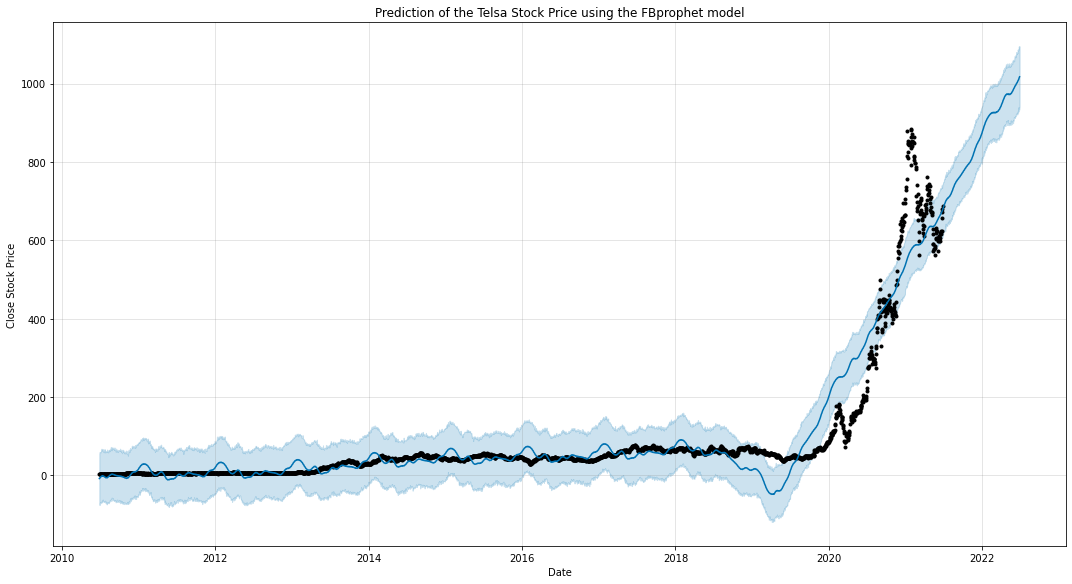

In [ ]:
future = model.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = model.predict(future)
model.plot(prediction,figsize=(15,8))
plt.title("Prediction of the Telsa Stock Price using the FBprophet model")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

### The black dots represent the actual values (all data for training) and the prediction is shown by the blue line with the blue shadow as the confidence interval.  The model predicted that possible future stock price from June 28, 2021 till June 28, 2022 ! 

### Conclusion : It seems that the Tesla Stock price will be around \$1000 per share by next year's June based on the model’s prediction.

### Recommendation: Since stocks are very volatile and are dependent on many factors such as shorts, dividends, interest rates and revenue, The model is only useful to predict the direction of the stock price change ceteris paribus. 

# Insights from the components

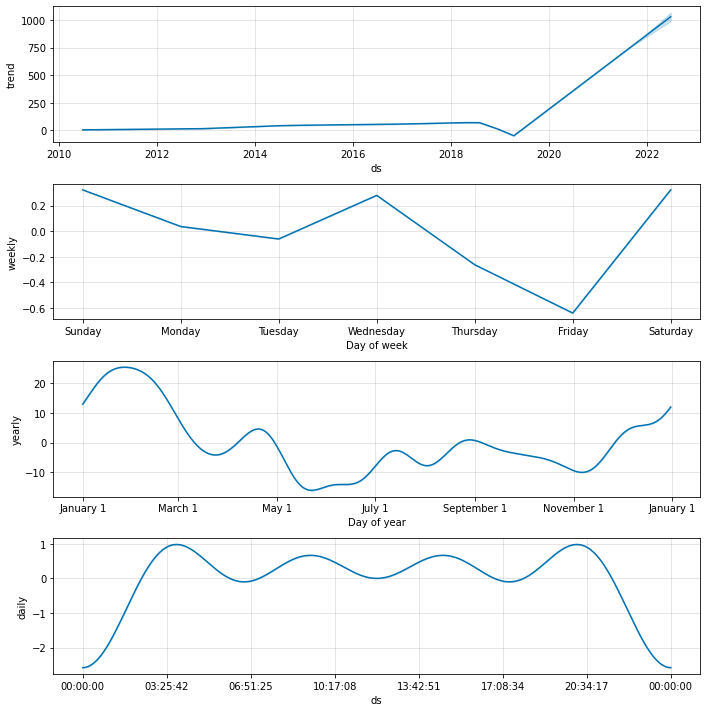

In [ ]:
model.plot_components(prediction,figsize=(10,10))
plt.show()

## Based on the estimated trends, the highest stock price occurst at the start of January (see 3rd subplot) and mostly on Wednesdays (see 2nd subplot). The prices are low during friday so it's probably a good idea to buy then.  

## As seen in the first subplot, we are expecting the continous growth of TESLA stocks in the near future as well (July 2021 to June 2022) 